1) You should state the null hypothesis and the alternative hypothesis of your research and explain your choices.  
$H{_0}=$ one-week rest from social networks has no effect on happiness level.  
$H{_1}=$ one-week rest from social networks increases the happiness level.  
This hypotheses narrow down the scope to one week as stater per the experiment. $H{_0}$ purely states that there's no relation between social networks and happines and that the status quo is maintained within the tested sample after one week. $H{_1}$ intends to prove the existing relation between avoding social networks and happiness boost.

2) You should state how X is distributed provided that null hypothesis holds.  
If $H{_0}$ holds, then $X \sim B(n,p)$, where $n$ = number of participants, p = probability for a participant's happiness increase. Under our setup, $p=0.5 | H{_0}$


3) Would you claim that people become happier when they avoid using social networks based on this data?  
Given the significance level $\alpha = 0.05$ and $X{_{obs}}=16$, let us calculate the respective p-value. If the probability to obtain the observed value $X{_{obs}}$ of random variable $X$ is less than $\alpha$, then we reject $H{_0}$ and accept $H{_1}$. As code below highlights, the p-value is ~$0.0013$, which is less than $\alpha$, so we reject $H{_0}$ and accept $H{_1}$. T-test also confirms the rejection of $H{_0}$, because z-score is higher than the rejection region value for $\alpha = 0.05$. Moreover, even if we set $\alpha = 0.01$, the p-value is still less than $\alpha$, so we would reject $H{_0}$ under this significance level as well, allowing us to claim that people become happier when they avoid using social networks based on this data with 99% confidence.

Although p-statistics and t-test both highlight quite a substantial evidence for rejecting the $H{_0}$, it is important to mention the limitations of the approach. First of all, we do not account for margins of 'happines' tested. The dichotomic nature of the experiment does not allow to test whether absence of social networks significantly increases the happines or not. Secondly, the sample size for the test is rather small. The bigger sample of the respondents would enhance the evidence to reject the $H{_0}$. Thirdly, we do not account for intervening variables - the participants don't live in a bubble and their happines is influenced by various sources, and not solely by social networks.


Test for alpha 0.05
p-value = 0.003 < 0.05 -> H0 is rejected

Test for alpha 0.01
p-value = 0.003 < 0.01 -> H0 is rejected

Test statistic: z_obs = 2.683


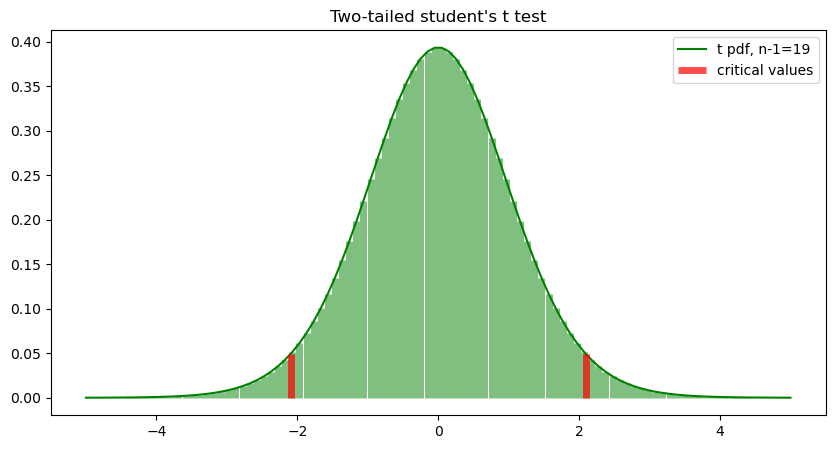

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

x_obs = 16
n = 20
p = 1/2
alphas = [0.05, 0.01]

pvalue = (1 - st.binom.cdf(x_obs, n, p)) * 2
pvalue_rounded = round(pvalue, 3)

for alpha in alphas:
    if pvalue > alpha:
        print(f'Test for alpha {alpha}\n:p-value = {pvalue_rounded} > {alpha} -> H0 is not rejected\n')
    else:
        print(f'Test for alpha {alpha}\np-value = {pvalue_rounded} < {alpha} -> H0 is rejected\n')

# finding t-statistic
z_obs = (x_obs - n*p) / np.sqrt(n*p*(1-p))
z_obs_rounded = round(z_obs, 3)
print(f'Test statistic: z_obs = {z_obs_rounded}')

# plotting results of two-tailed student's t test, n-1 degrees of freedom
x = np.linspace(-5, 5, 100)
y = st.t.pdf(x, n-1)
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'g', ms=8, label=f't pdf, n-1={n-1}')
plt.vlines(x, 0, y, colors='g', lw=5, alpha=0.5)
plt.vlines(st.t.ppf(1-alphas[0]/2, n-1), 0, st.t.pdf(st.t.ppf(1-alphas[0]/2, n-1), n-1), colors='r', lw=5, alpha=0.7, label='critical values')
plt.vlines(st.t.ppf(alphas[0]/2, n-1), 0, st.t.pdf(st.t.ppf(alphas[0]/2, n-1), n-1), colors='r', lw=5, alpha=0.7)
plt.title("Two-tailed student's t test")
plt.legend()
plt.show()